In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
def filename(dm, d, mult, split, r, lr, n):
    result = f"data/loss_dm{dm}_d{d}_mult{mult}_split{split}_r{r}_lr{lr}_n{n}.csv"
    print(result)
    return result

def filename_acc(dm, d, mult, split, r, lr, n):
    result = f"data/acc_dm{dm}_d{d}_mult{mult}_split{split}_r{r}_lr{lr}_n{n}.csv"
    print(result)
    return result

In [4]:
def makeDifferentRhoGraph(dm, d, rs, lr, n):
    
    colors = plt.cm.RdBu(np.linspace(0,1,len(rs)))[::-1]
    
    if dm == "uniform":
        dm_title = "Uniform"
    else:
        dm_title = "Constant"

    experiments = [{"mult": True, "split": True}, {"mult": True, "split": False}, {"mult": False, "split": True}, {"mult": False, "split": False}]
    fig, ax = plt.subplots(nrows=len(experiments), ncols=2, figsize=(20, 20)) # , gridspec_kw = {'wspace':0.2, 'hspace':0}

    for i, experiment in enumerate(experiments):
        mult, split = experiment["mult"], experiment["split"]
        
        mult_title = "Yes" if mult else "No"
        split_title = "Yes" if split else "No"
        
        ax[i, 0].set_prop_cycle('color', colors)
        ax[i, 0].set_title(f"Multipliers: {mult_title}, Splitted Data: {split_title}", size=20)
        ax[i, 0].set_yscale('log')
        ax[i, 0].set_xlabel('Iteration', size=20)
        ax[i, 0].set_ylabel('Cross Entropy Loss', size=20)
        baselineData = pd.read_csv(filename(dm, 1, mult, split, 1.0, lr, n), header=None)
        ax[i, 0].plot(baselineData, linestyle='--', label="no delay")
        for r in rs:
            data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
            ax[i, 0].plot(data, label=f"ρ = {r}")
        ax[i, 0].legend(loc='lower left', fontsize="20")
        
        ax[i, 1].set_prop_cycle('color', colors)
        ax[i, 1].set_xlabel('Iteration', size=20)
        ax[i, 1].set_ylabel('Accuracy', size=20)
        baselineData = pd.read_csv(filename_acc(dm, 1, mult, split, 1.0, lr, n), header=None)
        ax[i, 1].plot(baselineData, linestyle='--', label="no delay")
        for r in rs:
            data = pd.read_csv(filename_acc(dm, d, mult, split, r, lr, n), header=None)
            ax[i, 1].plot(data, label=f"ρ = {r}")
        ax[i, 1].legend(loc='lower right', fontsize="20")
    
    fig.tight_layout()
    plt.savefig(f'/Users/rene/University/master/thesis/thesis/figures/thesis_admmlogistic_rhos_dm{dm}.pdf')
    plt.show()
        

data/loss_dmconstant_d1_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitTrue_r5.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitTrue_r50.0_lr0.001_n5.csv
data/acc_dmconstant_d1_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/acc_dmconstant_d5_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/acc_dmconstant_d5_multTrue_splitTrue_r5.0_lr0.001_n5.csv
data/acc_dmconstant_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d5_multTrue_splitTrue_r50.0_lr0.001_n5.csv
data/loss_dmconstant_d1_multTrue_splitFalse_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitFalse_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitFalse_r5.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitFalse_r50.0_lr0.001_n5.csv
data/acc_dmconstant_d1_multTrue_splitFalse_r1.0_l

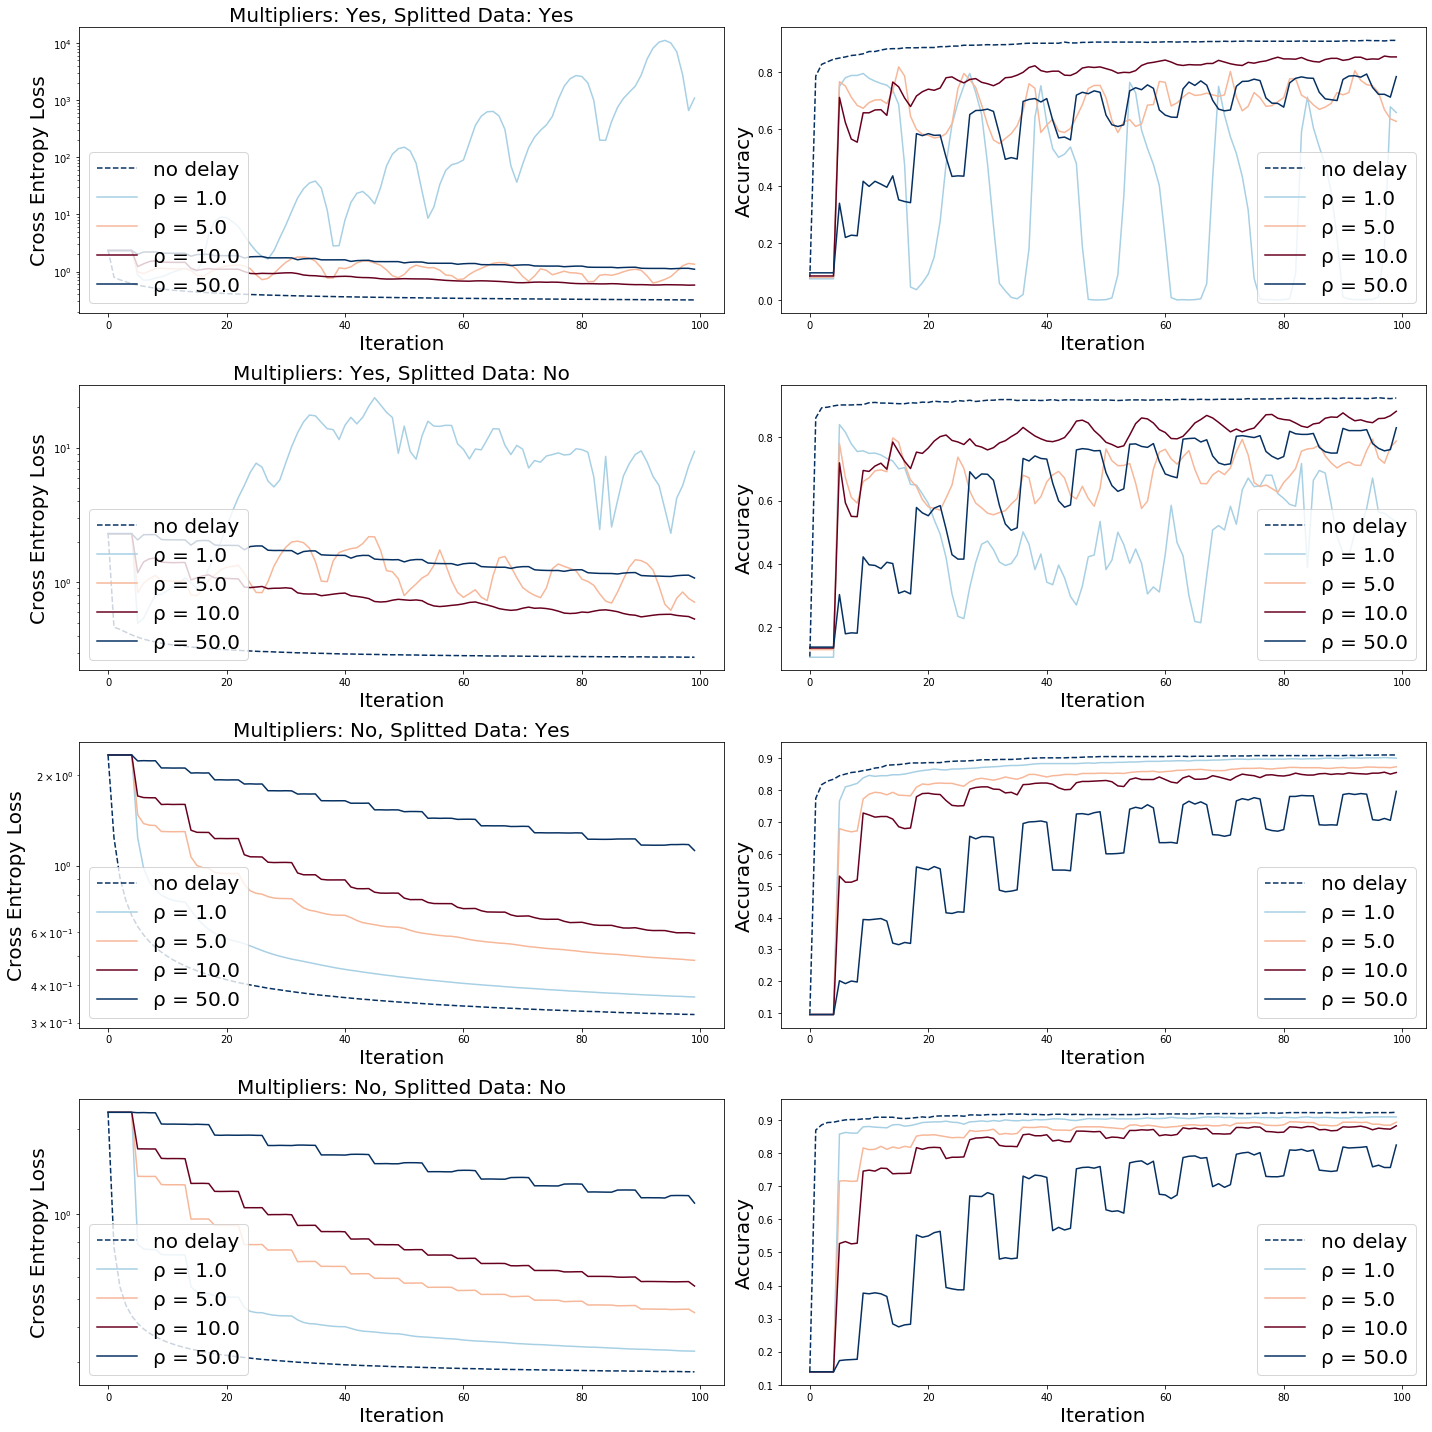

data/loss_dmuniform_d1_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitTrue_r5.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitTrue_r50.0_lr0.001_n5.csv
data/acc_dmuniform_d1_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/acc_dmuniform_d5_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/acc_dmuniform_d5_multTrue_splitTrue_r5.0_lr0.001_n5.csv
data/acc_dmuniform_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d5_multTrue_splitTrue_r50.0_lr0.001_n5.csv
data/loss_dmuniform_d1_multTrue_splitFalse_r1.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitFalse_r1.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitFalse_r5.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitFalse_r50.0_lr0.001_n5.csv
data/acc_dmuniform_d1_multTrue_splitFalse_r1.0_lr0.001_n5.csv
da

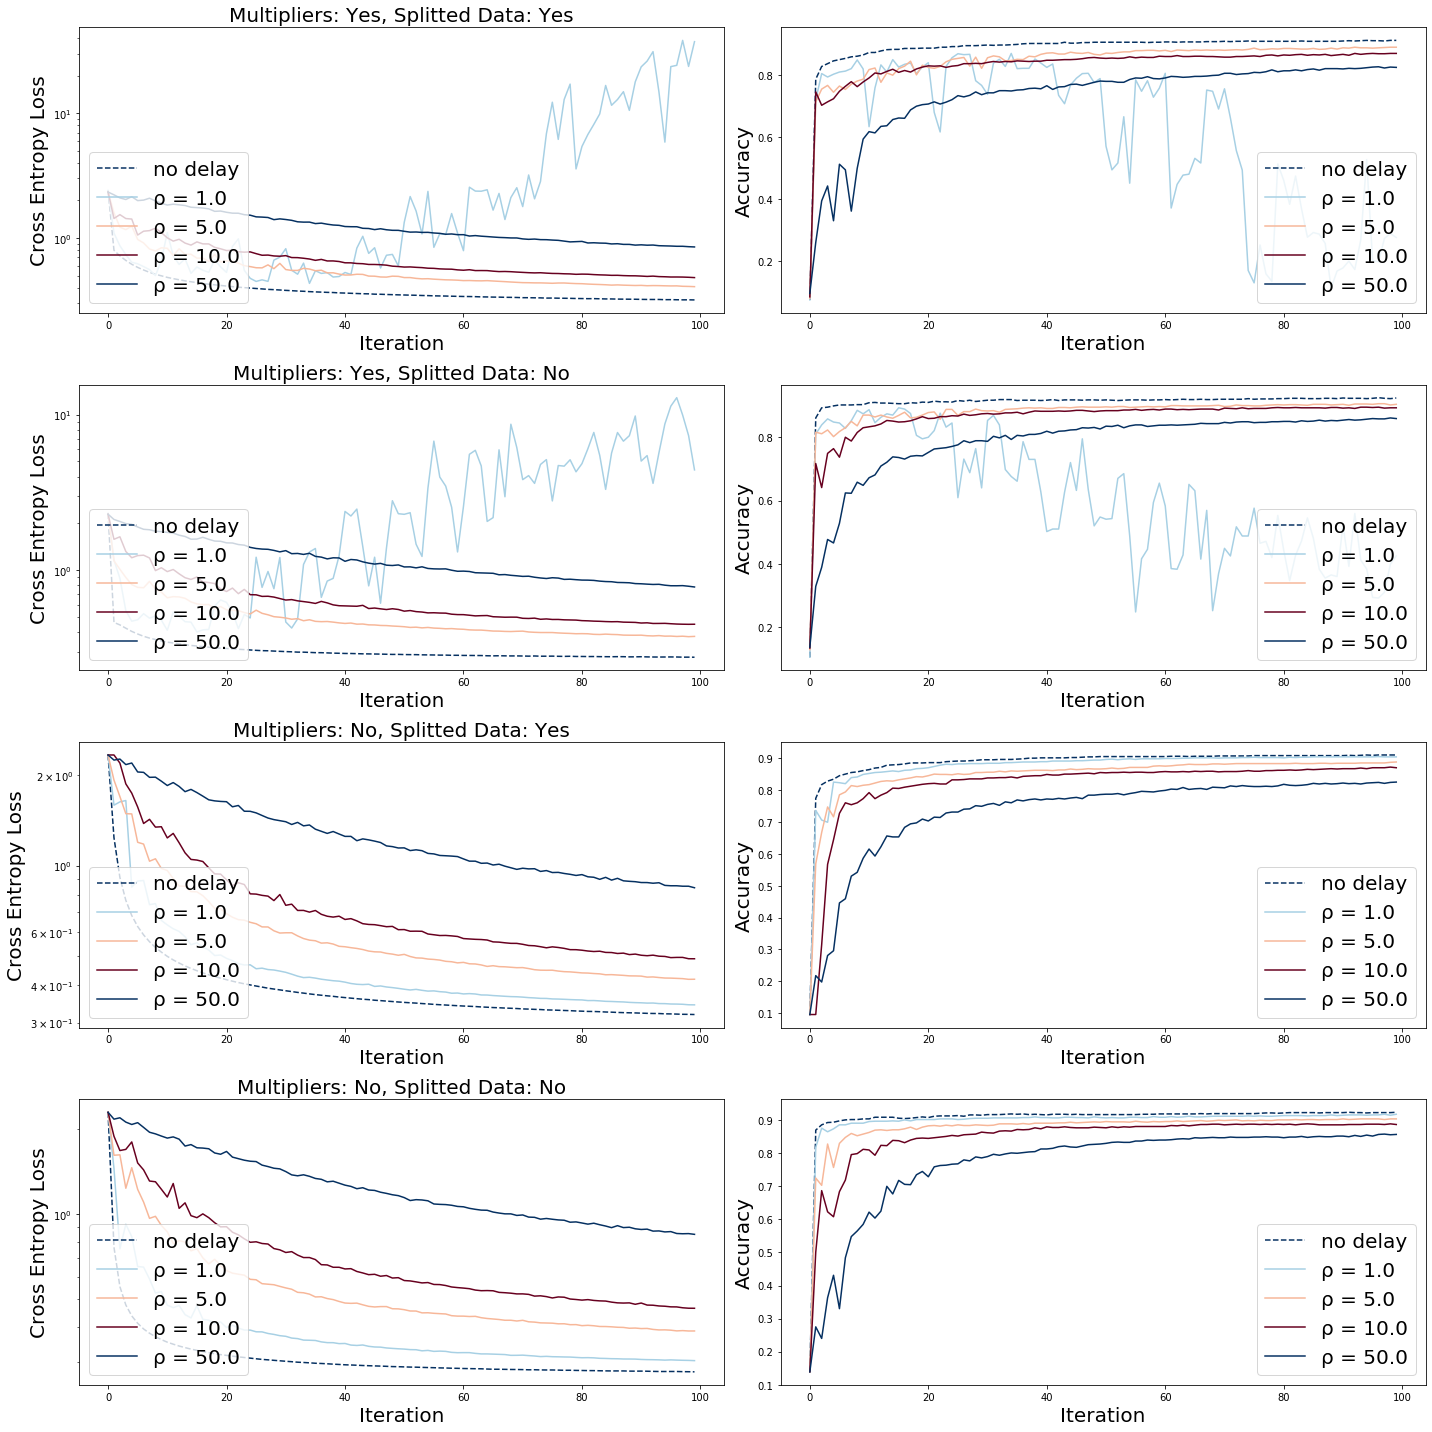

In [83]:
makeDifferentRhoGraph(dm="constant", d=5, rs=[1.0, 5.0, 10.0, 50.0], n=5, lr=0.001)
makeDifferentRhoGraph(dm="uniform", d=5, rs=[1.0, 5.0, 10.0, 50.0], n=5, lr=0.001)


In [11]:
def makeDifferentDelayGraph(dm, ds, r, lr, n):
    
    colors = plt.cm.RdBu(np.linspace(0,1,len(ds)))[::-1]
    
    if dm == "uniform":
        dm_title = "Uniform"
    else:
        dm_title = "Constant"

    experiments = [{"mult": True, "split": True}, {"mult": True, "split": False}, {"mult": False, "split": True}, {"mult": False, "split": False}]
    fig, ax = plt.subplots(nrows=len(experiments), ncols=2, figsize=(20, 20)) # , gridspec_kw = {'wspace':0.2, 'hspace':0}

    for i, experiment in enumerate(experiments):
        mult, split = experiment["mult"], experiment["split"]
        
        mult_title = "Yes" if mult else "No"
        split_title = "Yes" if split else "No"
        
        ax[i, 0].set_prop_cycle('color', colors)
        ax[i, 0].set_title(f"Multipliers: {mult_title}, Splitted Data: {split_title}", size=20)
        ax[i, 0].set_yscale('log')
        ax[i, 0].set_xlabel('Iteration', size=20)
        ax[i, 0].set_ylabel('Cross Entropy Loss', size=20)
        for d in ds:
            data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
            ax[i, 0].plot(data, label=f'τ = {d}')
#         ax[i, 0].legend(loc='lower left', fontsize="20")
        
        ax[i, 1].set_prop_cycle('color', colors)
#         ax[i, 1].set_title(f"Accuracy", size=20)
        ax[i, 1].set_xlabel('Iteration', size=20)
        ax[i, 1].set_ylabel('Accuracy', size=20)
        for d in ds:
            data = pd.read_csv(filename_acc(dm, d, mult, split, r, lr, n), header=None)
            ax[i, 1].plot(data, label=f'τ = {d}')
#         ax[i, 1].legend(loc='lower right', fontsize="20")
        
        
    
    fig.tight_layout()
    plt.savefig(f'/Users/rene/University/master/thesis/thesis/figures/thesis_admmlogistic_delays_dm{dm}.pdf')
    plt.show()



data/loss_dmconstant_d1_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d2_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d3_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d4_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d6_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d7_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d8_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d9_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d10_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d1_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d2_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d3_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d4_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d6_multTrue_splitTrue_r1

EmptyDataError: No columns to parse from file

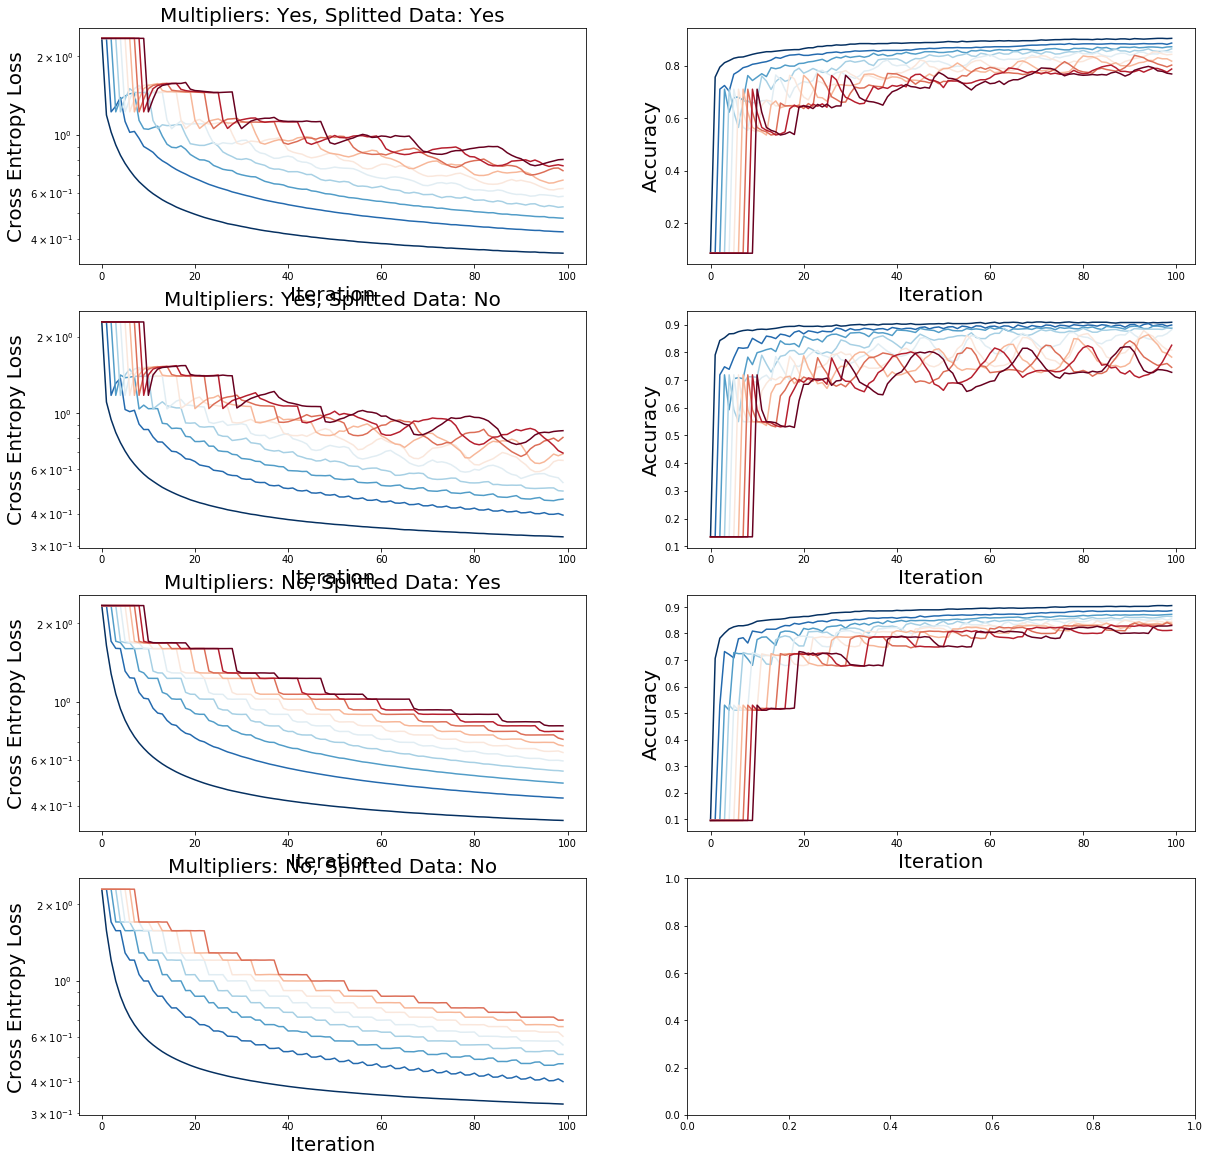

In [13]:
makeDifferentDelayGraph(n=5, lr=0.001, dm="constant", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
makeDifferentDelayGraph(n=5, lr=0.001, dm="uniform", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


















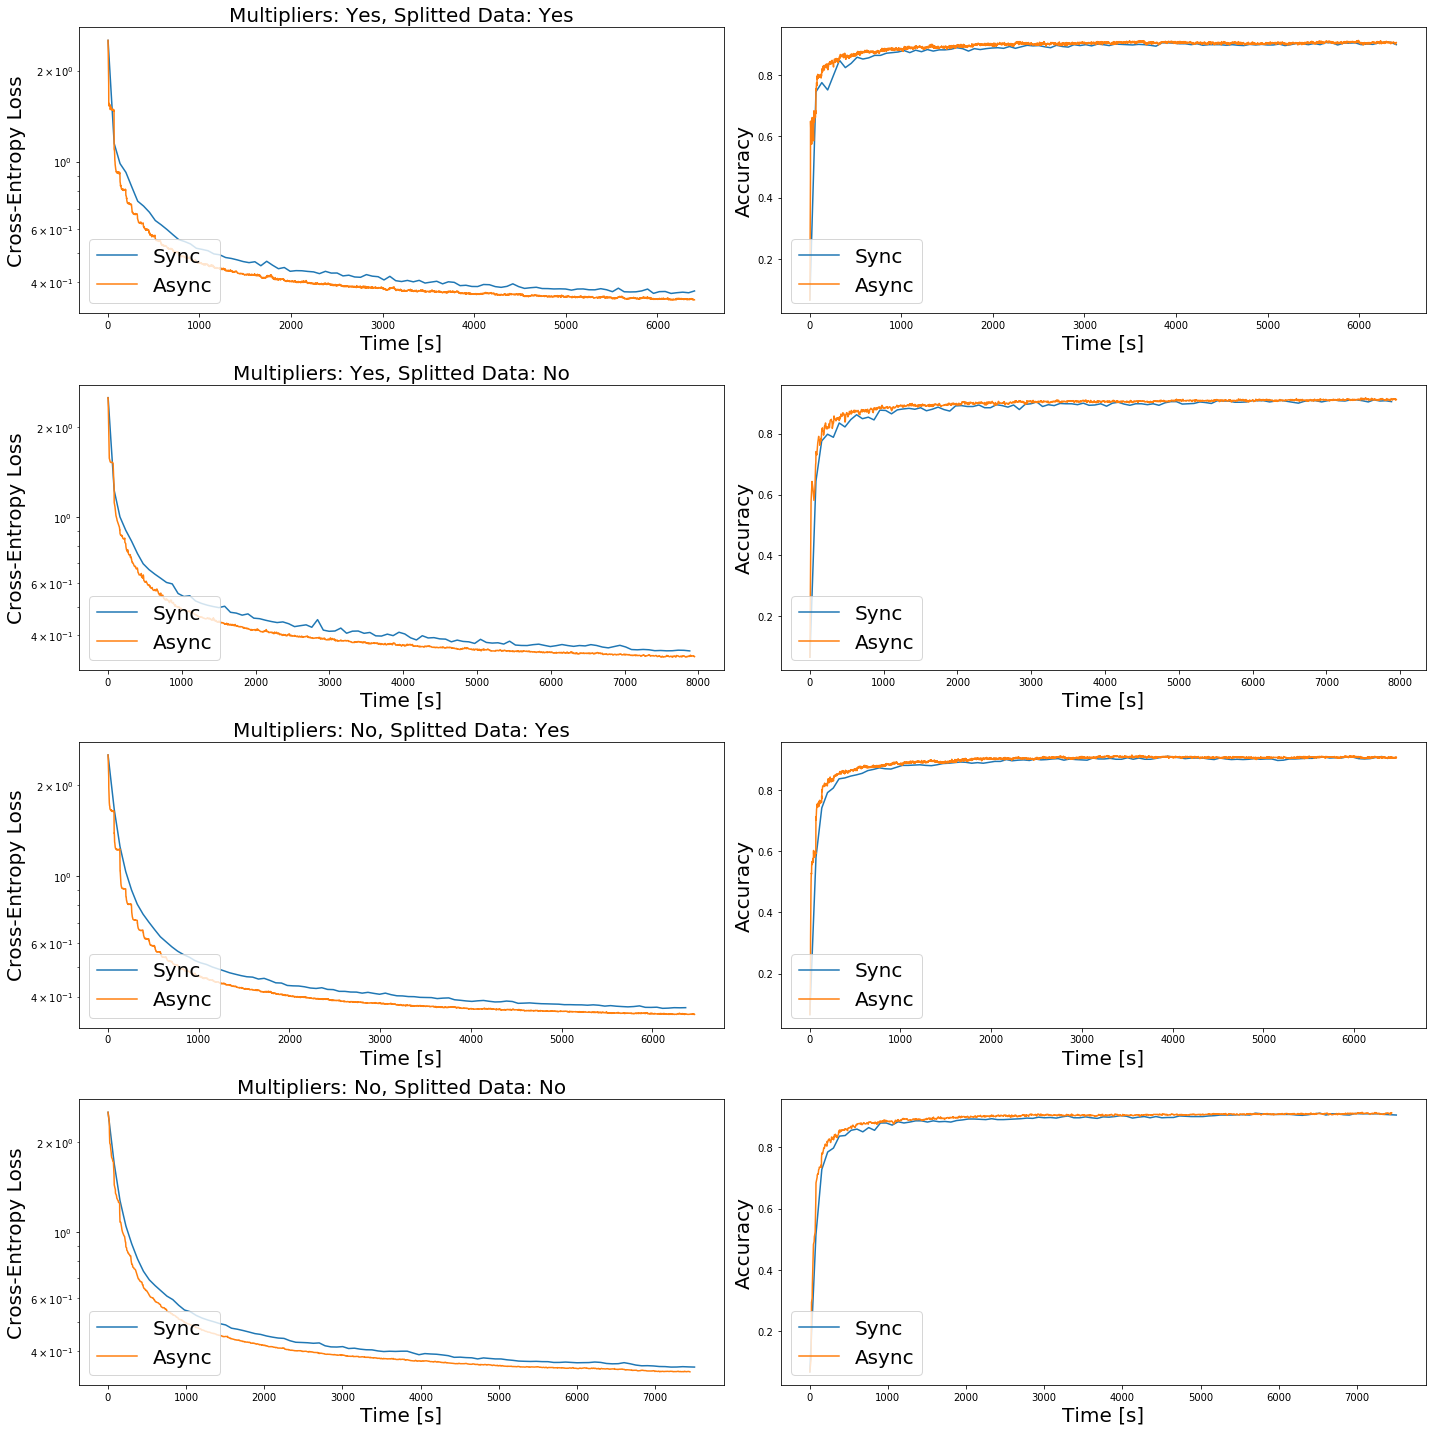

In [5]:
# Time plots
# colors = plt.cm.RdBu(np.linspace(0,1,2)[::-1]

experiments = [{"mult": True, "split": True}, {"mult": True, "split": False}, {"mult": False, "split": True}, {"mult": False, "split": False}]

fig, ax = plt.subplots(len(experiments), 2, figsize=(20, 20)) #{split}

for i, experiment in enumerate(experiments):
    mult, split = experiment["mult"], experiment["split"]
    mult_title = "Yes" if mult else "No"
    split_title = "Yes" if split else "No"
    syncData = pd.read_csv(f"data/loss_async_twoslow_mult{mult}_split{split}_b5_r10.0_lr0.01_n5.pdf.csv", sep=";", header=None)
    asyncData = pd.read_csv(f"data/loss_async_twoslow_mult{mult}_split{split}_b1_r10.0_lr0.01_n5.pdf.csv", sep=";", header=None)
    syncData_acc = pd.read_csv(f"data/acc_async_twoslow_mult{mult}_split{split}_b5_r10.0_lr0.01_n5.pdf.csv", sep=";", header=None)
    asyncData_acc = pd.read_csv(f"data/acc_async_twoslow_mult{mult}_split{split}_b1_r10.0_lr0.01_n5.pdf.csv", sep=";", header=None)
    ax[i, 0].set_yscale('log')
    ax[i, 0].set_title(f"Multipliers: {mult_title}, Splitted Data: {split_title}", size=20)
    ax[i, 0].set_xlabel('Time [s]', size=20)
    ax[i, 0].set_ylabel('Cross-Entropy Loss', size=20)
    ax[i, 0].plot(syncData[0], syncData[1], label='Sync')
    ax[i, 0].plot(asyncData[0], asyncData[1], label='Async')
    ax[i, 0].legend(loc='lower left', fontsize="20")

    ax[i, 1].set_xlabel('Time [s]', size=20)
    ax[i, 1].set_ylabel('Accuracy', size=20)
    ax[i, 1].plot(syncData_acc[0], syncData_acc[1], label='Sync')
    ax[i, 1].plot(asyncData_acc[0], asyncData_acc[1], label='Async')
    ax[i, 1].legend(loc='lower left', fontsize="20")

fig.tight_layout()
plt.savefig("/Users/rene/University/master/thesis/thesis/figures/thesis_admmlogistic_twoslow_all.pdf")